In [2]:
import pandas as pd
from collections import Counter
from tqdm import tqdm
from vincenty import vincenty
import geopandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import numpy as np
from sklearn.cluster import KMeans
from numpy import vstack,array
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2, whiten, kmeans,vq
from itertools import combinations
import networkx as nx

In [82]:
df = pd.read_csv('../dataset/dataset_with_users_and_clusters.csv')
df.head()

id     username                 name        lat        lon  \
0  50988380961  jasonpfinch  Late winter 2020-21  60.449969  22.265006   
1  50988488177  jasonpfinch  Late winter 2020-21  60.449969  22.265006   
2  50988380816  jasonpfinch  Late winter 2020-21  60.449969  22.265006   
3  50988380741  jasonpfinch  Late winter 2020-21  60.449969  22.265006   
4  50988487997  jasonpfinch  Late winter 2020-21  60.449969  22.265006   

  locality          region neighbourhood  cluster_id  
0    Turku  Finland Proper         Turku           7  
1    Turku  Finland Proper         Turku           7  
2    Turku  Finland Proper         Turku           7  
3    Turku  Finland Proper         Turku           7  
4    Turku  Finland Proper         Turku           7

In [88]:
df1 = df.groupby(['username','cluster_id']).size().reset_index().rename(columns={0:'count'})
df1

username  cluster_id  count
0     #PhotographyByMe         174      2
1               #S+A+S          17     15
2                   &y           6      3
3          (c)avddrift          38      2
4          (c)avddrift         143      2
...                ...         ...    ...
8140                賀禎         174     20
8141                賀禎         230     12
8142                雷太           6      8
8143                雷太         217      4
8144                雷太         353      2

[8145 rows x 3 columns]

In [89]:
clusters = pd.read_csv('../dataset/clusters.csv')
clusters.index.name = 'cluster_id'
clusters.head()

lat        lon  size
cluster_id                            
0           60.185053  24.981616   442
1           68.437074  22.655985    15
2           64.816718  26.025058    81
3           68.845523  28.315072   482
4           62.801776  27.830240    37

In [90]:
usernames = df1.username.unique()
cluster_ids = df1.cluster_id.unique()

In [42]:
entries = pd.DataFrame(columns=['cluster_id0', 'cluster_id1', 'entries'])

for combo in tqdm(combinations(cluster_ids, 2)):
    c0 = combo[0]
    c1 = combo[1]
    c0_df = df1[(df1['cluster_id']==c0)].username.unique()
    c1_df = df1[(df1['cluster_id']==c1)].username.unique()
    n_entries = len(set(c0_df) & set(c1_df))
    new_row = {'cluster_id0': c0, 'cluster_id1': c1, 'entries': n_entries}
    entries = entries.append(new_row, ignore_index=True)


    

124750it [08:49, 235.38it/s]


In [46]:
entries = pd.read_csv('../dataset/cluster_conenctions.csv')
entries

cluster_id0  cluster_id1  entries
0               174           17        2
1               174            6        0
2               174           38        9
3               174          143        3
4               174          317        5
...             ...          ...      ...
124745          260          239        0
124746          260          497        0
124747           95          239        0
124748           95          497        0
124749          239          497        1

[124750 rows x 3 columns]

In [75]:
G = nx.Graph()

for c in tqdm(clusters.iterrows()):
    G.add_node(c[0], pos=(c[1]['lat'], c[1]['lon']))

500it [00:00, 18530.99it/s]


In [76]:
for row in tqdm(entries.iterrows()):
    if row[1]['entries'] > 2:
        G.add_edge(row[1]['cluster_id0'],
               row[1]['cluster_id1'],
               weight=row[1]['entries'])

124750it [00:09, 13591.77it/s]


Text(0.5, 1.0, 'Plotting Spatial Data')

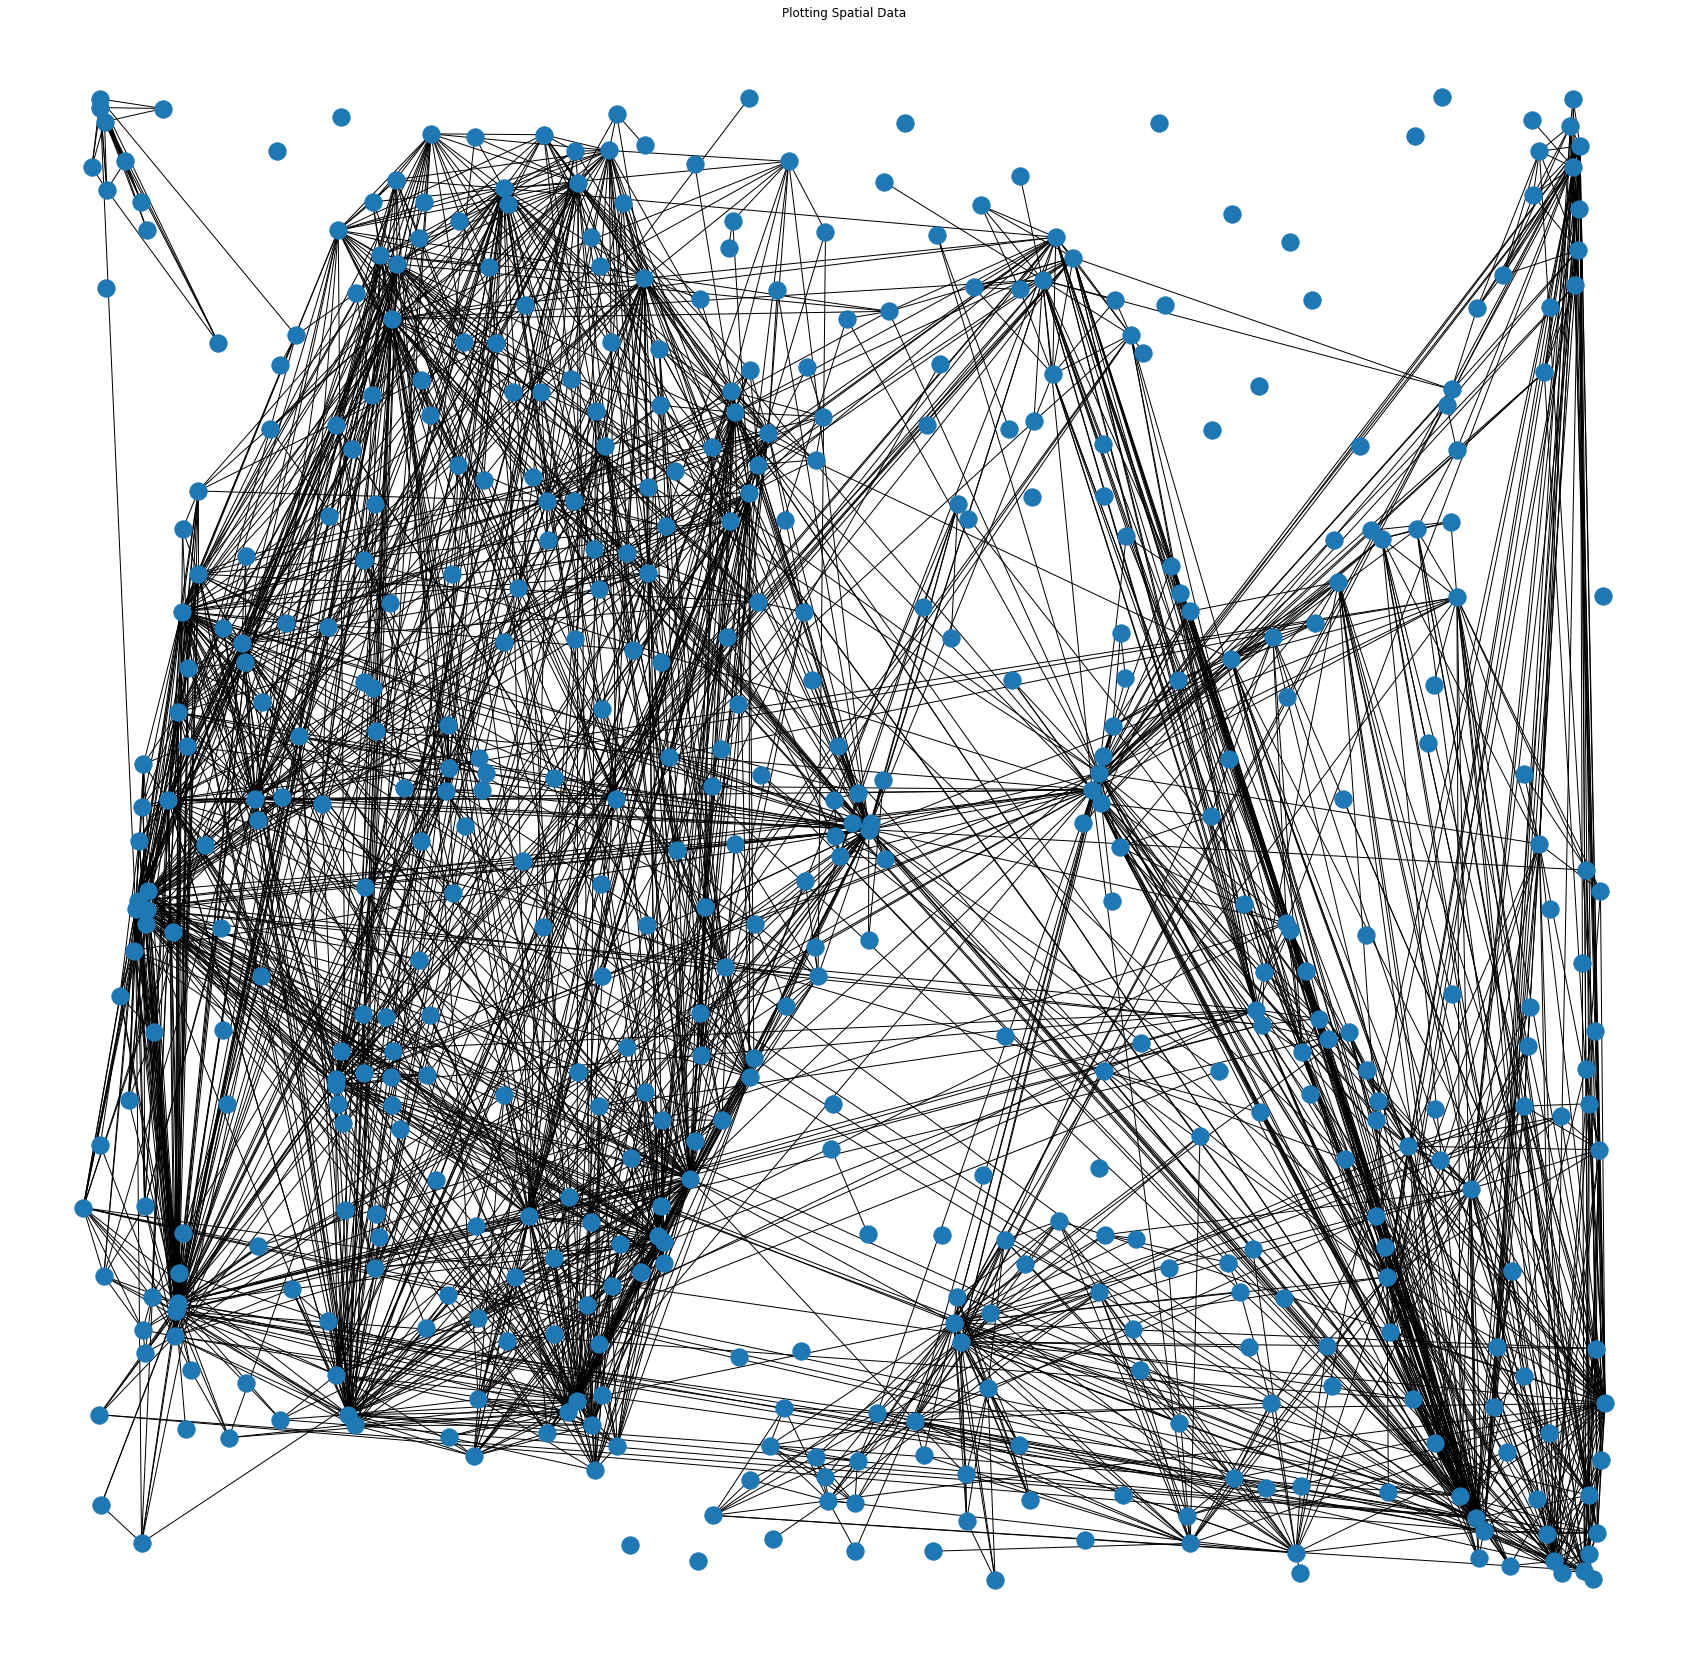

In [77]:
fig, ax = plt.subplots(figsize = (30,30))
nx.draw(G, nx.get_node_attributes(G, 'pos'))
ax.set_title('Plotting Spatial Data')